# CS 3110/5110: Data Privacy
## In-Class Exercise, Week of 10/02/2023

In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def laplace_mech_vec(vec, sensitivity, epsilon):
    return [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in vec]

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def gaussian_mech_vec(vec, sensitivity, epsilon, delta):
    return [v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon) for v in vec]

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

## Question 1

How do the Laplace and Gaussian mechanisms compare in terms of relative error on the query "how many individuals are over 50 years old" with $\epsilon = 1$ and $\delta = 10^{-5}$?

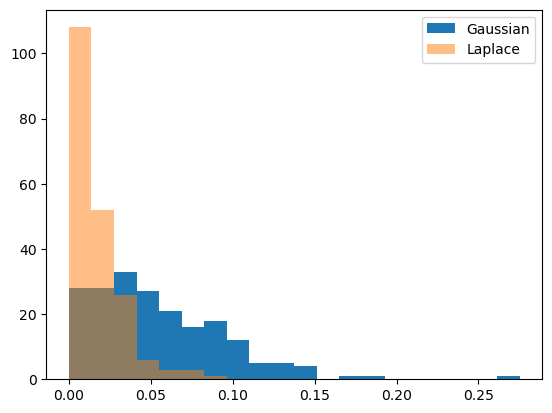

In [2]:
true_answer = len(adult[adult['Age'] > 50])

laplace_answers = [laplace_mech(true_answer, 1, 1) for _ in range(200)]
gaussian_answers = [gaussian_mech(true_answer, 1, 1, 10e-5) for _ in range(200)]

laplace_error = [pct_error(true_answer, a) for a in laplace_answers]
gaussian_error = [pct_error(true_answer, a) for a in gaussian_answers]

_, bins, _ = plt.hist(gaussian_error, bins=20, label='Gaussian')
plt.hist(laplace_error, bins=bins, label='Laplace', alpha=0.5)
plt.legend();

In general, the Laplace mechanism gives better error that the Gaussian mechanism. If we do a single query, the Laplace mechanism will always give better accuracy than the Gaussian mechanism.

## Question 2

The function `age_cdf` calculates the cumulative distribution function (CDF) of the ages in the adult dataset, expressed as a vector of counts.

What is the **L1 global sensitivity** of `age_cdf`?

Length of CDF vector: 100


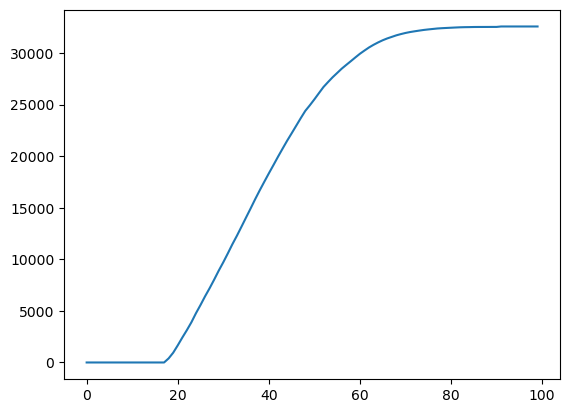

In [3]:
def age_cdf():
    a = adult['Age']
    return [len(a[a < i]) for i in range(100)]

plt.plot(age_cdf());
print('Length of CDF vector:', len(age_cdf()))

The L1 sensitivity is 100

## Question 3

What is the **L2 global sensitivity** of `age_cdf`?

- The L2 global sensitivity is the square root of the sum of the squares of the element-wise sensitivities
- Each element of the vector is a count, so it has a sensitivity of 1 and a squared sensitivity of `1*1 = 1`
- Thus the L2 global sensitivity is sqrt(100) = 10
- This is **much less** than the L1 sensitivity of 100

## Question 4

Use the vector-valued Laplace and Gaussian mechanisms to construct noisy versions of the CDF of ages. **Be sure to use the right sensitivity!**

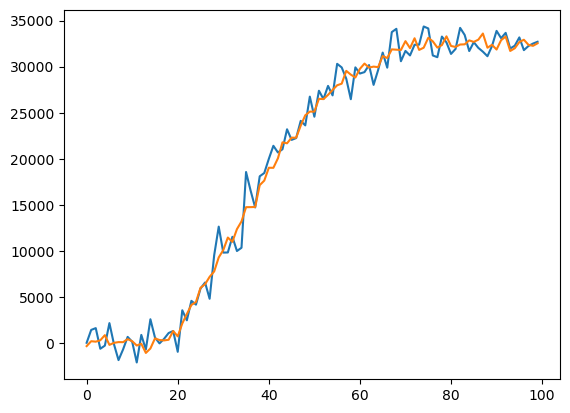

In [4]:
def laplace_cdf(epsilon):
    # YOUR CODE HERE
    raise NotImplementedError()

def gaussian_cdf(epsilon, delta):
    # YOUR CODE HERE
    raise NotImplementedError()

plt.plot(laplace_cdf(0.1));
plt.plot(gaussian_cdf(0.1, 1e-5));

## Question 5

Write a function to calculate the L1 **local sensitivity** of the following mean query.

In [ ]:
def mean_query():
    b = 125
    return adult['Age'][adult['Education'] == 'Bachelors'].clip(lower=0, upper=b).mean()

mean_query()

In [ ]:
def mean_query_local_sensitivity():
    # YOUR CODE HERE
    raise NotImplementedError()

mean_query_local_sensitivity()

In [ ]:
# TEST CASE
assert (mean_query_local_sensitivity() - 0.02333831217326363) < 0.0001

## Question 6

Why can't we use the local sensitivity from question 1 directly to achieve differential privacy for `mean_query`?

YOUR ANSWER HERE

## Question 7

Implement an upper bound on $A(f, x, k)$, the local sensitivity of a mean query at distance $k$.

In [ ]:
def ls_mean_at_distance(df, b, k):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE
assert ls_mean_at_distance(adult['Age'], 125, 500) == 0.0038988178784192633
assert ls_mean_at_distance(adult['Age'], 125, 5000) == 0.004535394216465295

## Question 8

Implement an upper bound on $D(f, x, s)$, the distance from $x$ to a database where the local sensitivity of the mean query is greater than or equal to $s$.

In [ ]:
def dist_to_high_ls_mean(df, b, s):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TEST CASE
assert dist_to_high_ls_mean(adult['Age'], 125, 0.1) == 31311 
assert dist_to_high_ls_mean(adult['Age'], 125, 0.01) == 20061
assert dist_to_high_ls_mean(adult['Age'], 125, 0.001) == 0

## Question 9

Use the Propose-Test-Release (PTR) framework to calculate the mean age in the adult dataset with differential privacy.

In [ ]:
def mean_ptr(epsilon, delta):
    # YOUR CODE HERE
    raise NotImplementedError()

mean_ptr(1.0, 10e-5)

In [ ]:
# TEST CASE

true_answer = adult['Age'].mean()
trials = [mean_ptr(1.0, 10e-5) for _ in range(20)]
errors = [pct_error(true_answer, x) for x in trials]
assert np.mean(errors) < 1.0

## Exploration: how low can the proposal be?

In [ ]:
xs = np.linspace(0.001, 0.01)
clipped_ages = adult['Age'].clip(lower=0, upper=125)
ys = [dist_to_high_ls_mean(clipped_ages, 125, p) for p in xs]

In [ ]:
plt.plot(xs, ys)